In [1]:
import tensorflow as tf
import tensorflow.keras as k
import numpy as np
from IPython.display import Image
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.mobilenet_v2 import imagenet_utils
import time
from tqdm import tqdm_notebook
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
mobileNet = k.applications.mobilenet_v2
model = mobileNet.MobileNetV2(weights='imagenet')
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

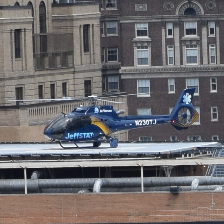

In [3]:
Image(filename='sample/0.png')

In [4]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded_dims)

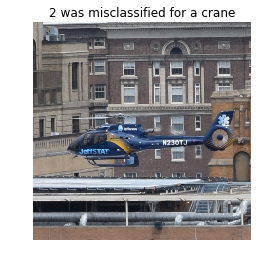

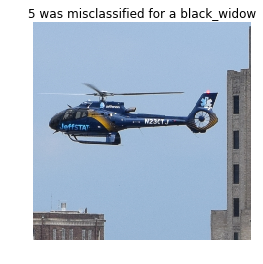

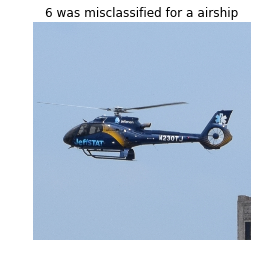

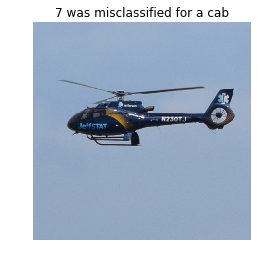

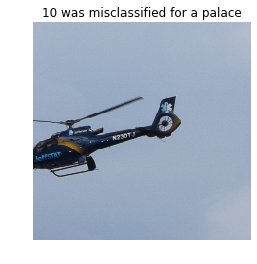

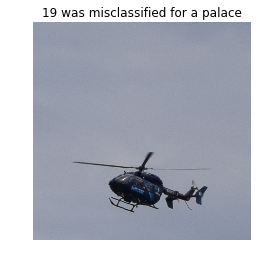

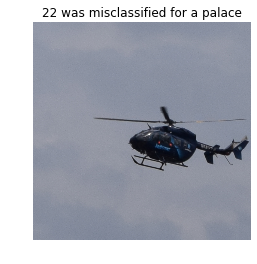

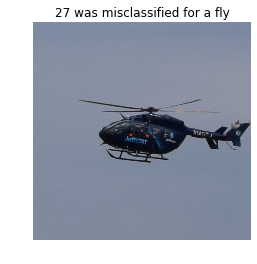

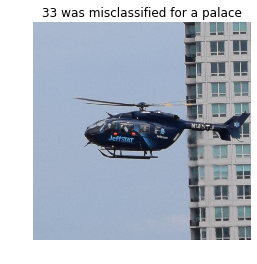

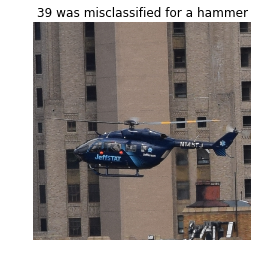

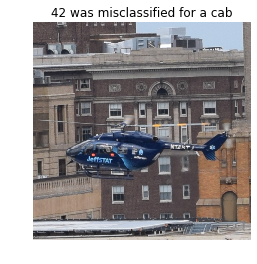

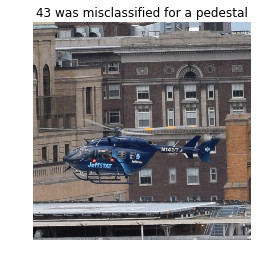

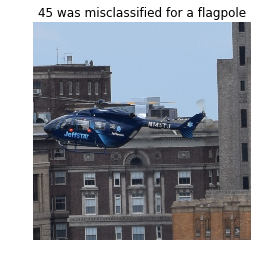

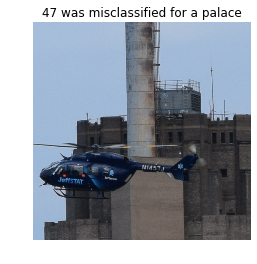

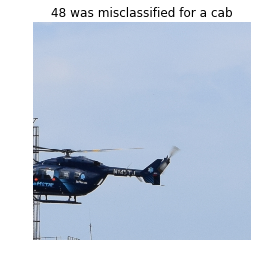

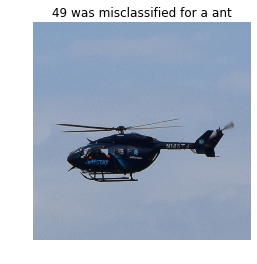

In [5]:
inputIm = np.array([f for f in glob.glob("sample/*.png")])
results = []
inferenceTime = []
for index, img in enumerate(inputIm):
    preprocessed_image = prepare_image(img)
    t0 = time.perf_counter()
    predictions = model.predict(preprocessed_image)
    t1 = time.perf_counter()
    inferenceTime.append(t1-t0)
    top1 = mobileNet.decode_predictions(predictions, top=1)[0][0][1:]
    results.append(list(top1)) # tuple-> list
    
    # Show what failed
    if top1[0] != 'warplane':
        plt.figure()
        plt.imshow(plt.imread('sample/'+str(index)+'.png'))
        plt.title("{} was misclassified for a {}".format(index, top1[0]))
        plt.axis('off')

In [6]:
results

[['warplane', 0.92736006],
 ['warplane', 0.91671544],
 ['crane', 0.09648236],
 ['warplane', 0.16416134],
 ['warplane', 0.2972348],
 ['black_widow', 0.18946996],
 ['airship', 0.27527356],
 ['cab', 0.19935383],
 ['warplane', 0.44633466],
 ['warplane', 0.32355073],
 ['palace', 0.12283863],
 ['warplane', 0.6602512],
 ['warplane', 0.5649762],
 ['warplane', 0.81180704],
 ['warplane', 0.86517715],
 ['warplane', 0.60028225],
 ['warplane', 0.5899729],
 ['warplane', 0.77808714],
 ['warplane', 0.49608248],
 ['palace', 0.3605919],
 ['warplane', 0.5498004],
 ['warplane', 0.6801763],
 ['palace', 0.20142736],
 ['warplane', 0.17128712],
 ['warplane', 0.7942782],
 ['warplane', 0.4264721],
 ['warplane', 0.5532418],
 ['fly', 0.2588944],
 ['warplane', 0.57794935],
 ['warplane', 0.9357627],
 ['warplane', 0.64813346],
 ['warplane', 0.8297646],
 ['warplane', 0.26261407],
 ['palace', 0.42956403],
 ['warplane', 0.14913672],
 ['warplane', 0.50181246],
 ['warplane', 0.8102709],
 ['warplane', 0.9067899],
 ['warpl

Text(0.5, 1.0, 'Average top-1 confidence 48.80%')

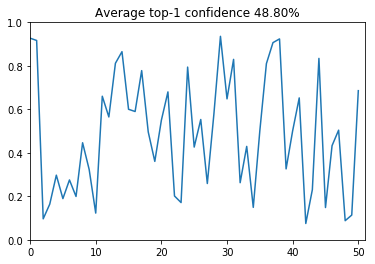

In [7]:
plt.figure()
confidence = [entry[1] for entry in results]
plt.plot(confidence)
plt.axis([0, len(results), 0, 1])
plt.title("Average top-1 confidence {:.2f}%".format(100*np.mean(confidence)))

Text(0, 0.5, 'Inference time [s]')

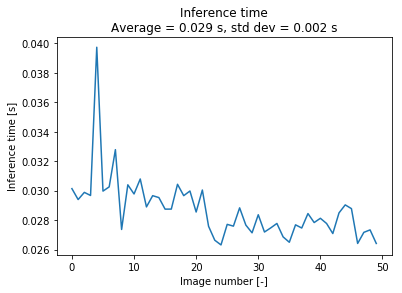

In [11]:
plt.figure()
inferenceTime = inferenceTime[1:]
plt.plot(inferenceTime)
plt.title("Inference time\nAverage = {:.3f} s, std dev = {:.3f} s".format(np.mean(inferenceTime), np.std(inferenceTime)))
plt.xlabel("Image number [-]")
plt.ylabel("Inference time [s]")

In [9]:
# Random prediction
preprocessed_image = prepare_image(inputIm[np.random.randint(len(inputIm))])
predictions = model.predict(preprocessed_image)
results = mobileNet.decode_predictions(predictions, top=1)
print(results)

[[('n04552348', 'warplane', 0.57794935)]]
